In [1]:
%matplotlib inline

import os
import sys
import copy
import aplpy
import numpy as np
#np.seterr(over='ignore')
import scipy as sp
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, FloatSlider, IntSlider

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

# filtering Astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)


sys.path.append('../lib/')
from hdsources import *
from utils import *
from graph import *
from preprocessing import *
from gmr import *

/Users/martin/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


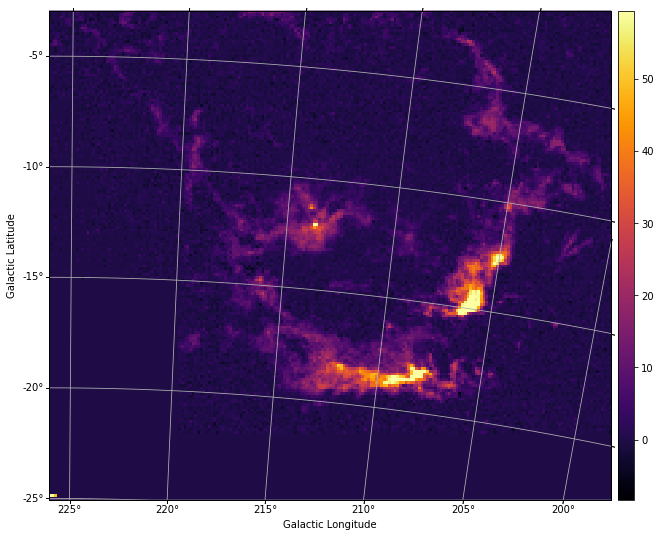

In [2]:
#fits_path = '../data/images/Orion.cont.image.fits'
#fits_path = '../data/images/OphA_ExtnCambR_F.fits'
#fits_path = '../data/images/PerA_Extn2MASS_F_Gal.fits'
#fits_path = '../data/images/RhoOphiuchus60.fits'
#fits_path = '../data/images/perseus60.fits'
#fits_path = '../data/images/Orion.cont.image.fits'
fits_path = '../data/SCIMES/orion_12CO_mom0.fits'

data, wcs = load_data(fits_path)
base_level = estimate_rms(data)
image_plot(data, wcs=wcs)

In [3]:
preprocessing(data, wcs)

interactive(children=(FloatSlider(value=6.833755925097559, description='back_level', max=13.667511850195117, min=0.34168779625487794, step=0.13325824053940238), Output()), _dom_classes=('widget-interact',))

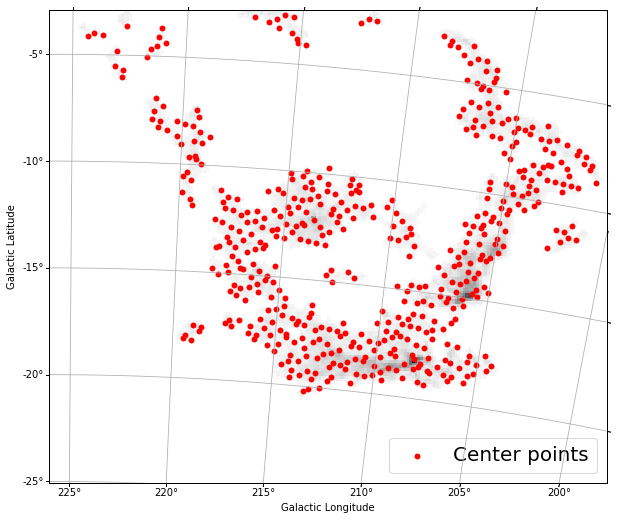

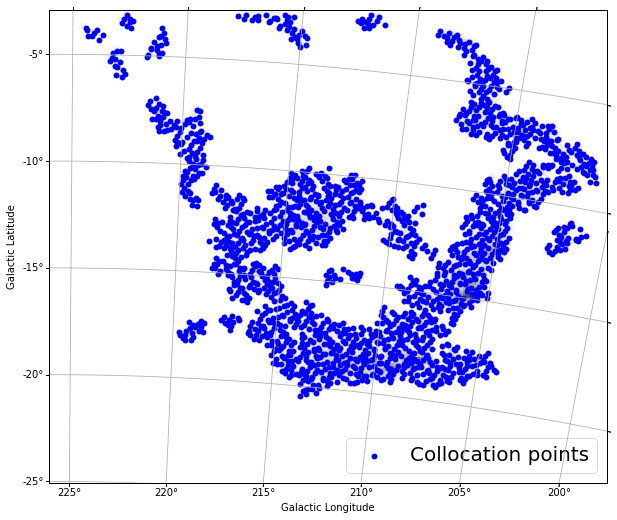

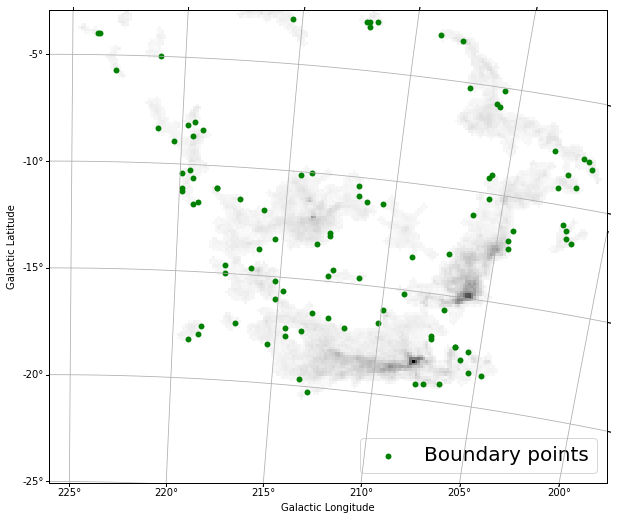

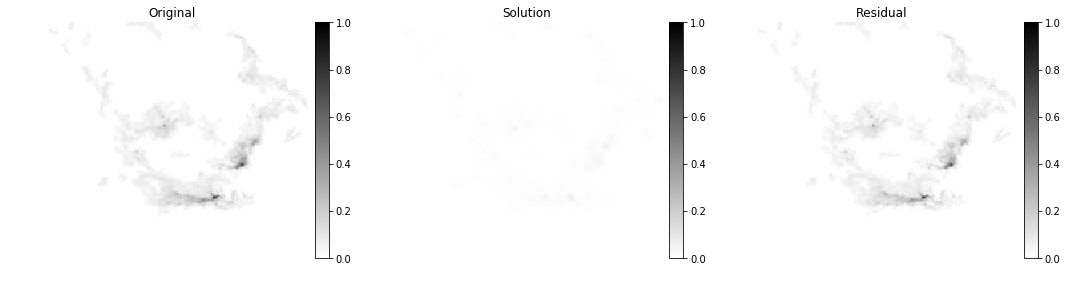

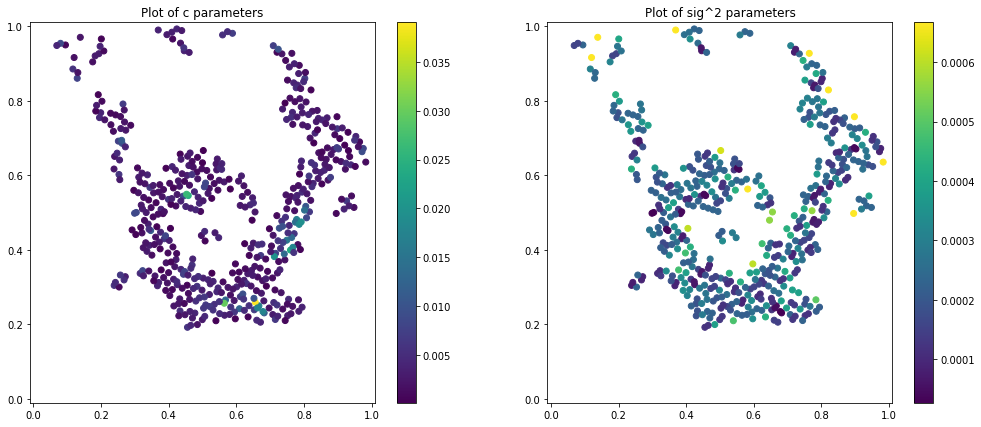

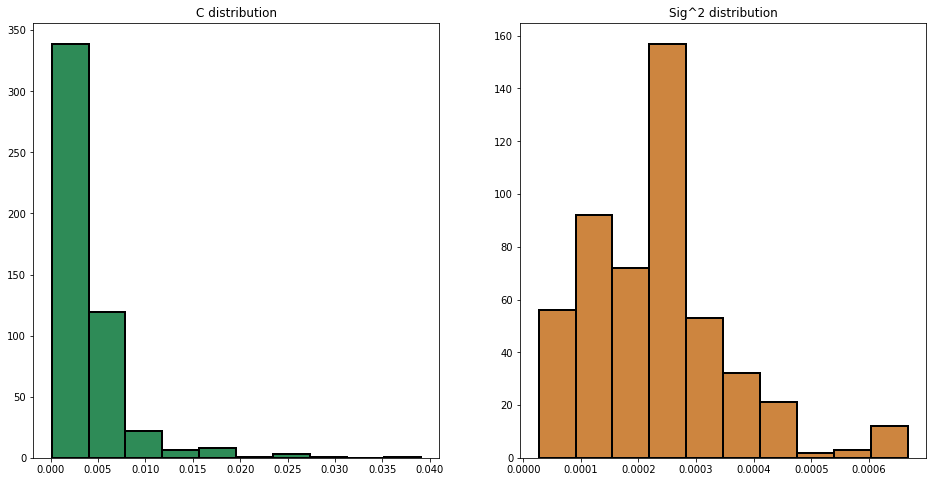

In [4]:
hds = HDSources(data, back_level=1.00798, wcs=wcs, verbose=True, n_center=500)

In [5]:
hds.build_gmr()


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 200100.
nfev: 200106

Residual stats:
Residual RMS: 0.021702438930360095
Residual Variance: 0.0004507600611735143
Flux Lost: 0.12538398187759003
Flux Addition: 0.06435612595208308
Exceeded Pixels: 2682
Total elapsed time: 2250.511661052704 [s]


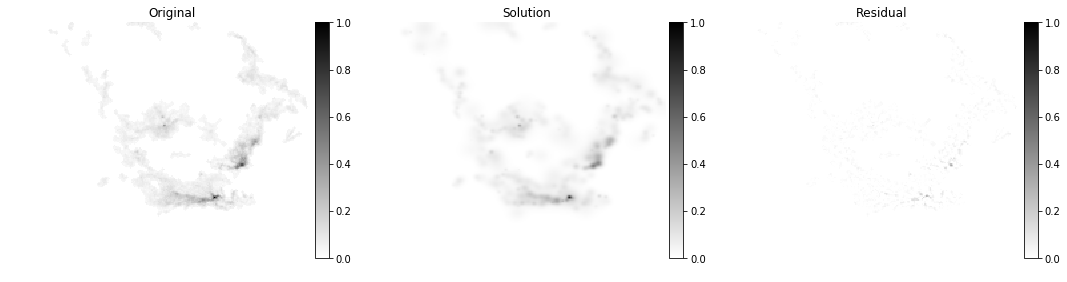

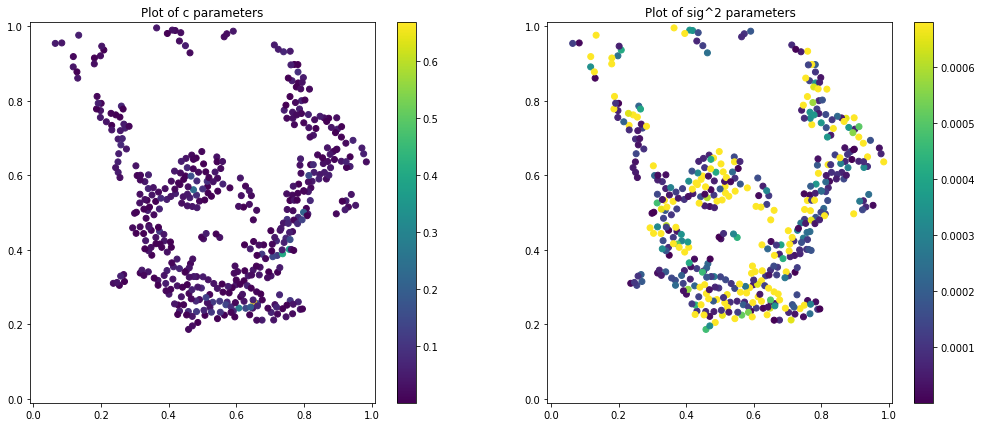

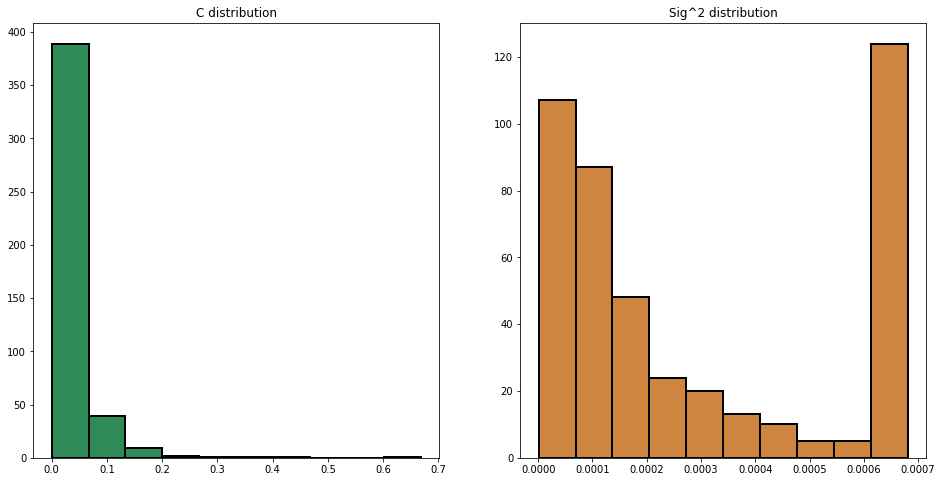

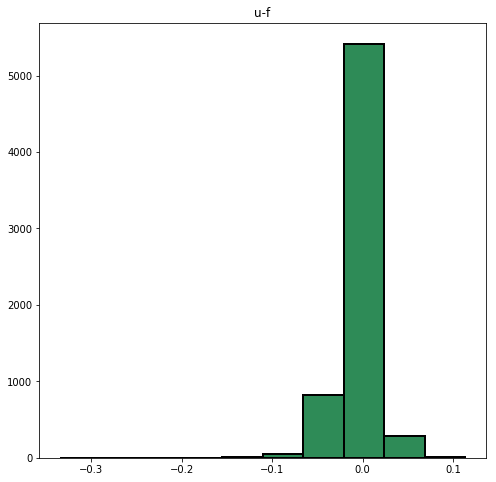

In [6]:
hds.summarize()

In [7]:
xc, yc, c, sig = hds.get_params_mapped()
mu = np.vstack([xc,yc]).T

In [8]:
sd, htree = gaussian_reduction(c, mu, sig, 1)

Merged components 158 and 221 with 6.024383763086476e-07 KL dist and 2.1798830373166017e-12 ISD dist
Merged components 137 and 223 with 2.8860440671151904e-06 KL dist and 2.4531200760514495e-10 ISD dist
Merged components 199 and 331 with 3.1045158992784594e-06 KL dist and 1.6427125935566944e-10 ISD dist
Merged components 183 and 417 with 3.1180889458290884e-06 KL dist and 6.680681563508983e-10 ISD dist
Merged components 207 and 380 with 4.9525748812279786e-06 KL dist and 4.658417157965257e-12 ISD dist
Merged components 113 and 294 with 5.783594191019401e-06 KL dist and 1.3538010296132441e-09 ISD dist
Merged components 265 and 408 with 6.131956941487273e-06 KL dist and 3.409011045101554e-10 ISD dist
Merged components 28 and 204 with 8.819437999402967e-06 KL dist and 2.2949729562412936e-08 ISD dist
Merged components 236 and 288 with 9.548013299054414e-06 KL dist and 5.413932756964668e-10 ISD dist
Merged components 274 and 326 with 1.3064016899488017e-05 KL dist and 2.5410228365885246e-09

Merged components 370 and 469 with 0.0016124888432625661 KL dist and 0.00028975616547351896 ISD dist
Merged components 478 and 512 with 0.001717351453911331 KL dist and 6.272120334102627e-05 ISD dist
Merged components 154 and 492 with 0.0017456076382556425 KL dist and 9.327808372264212e-05 ISD dist
Merged components 86 and 337 with 0.0018352214296005701 KL dist and 0.0004026269656998444 ISD dist
Merged components 181 and 315 with 0.0019474023865204866 KL dist and 2.663856669714651e-05 ISD dist
Merged components 230 and 468 with 0.0019814087657015964 KL dist and 1.4838943108479857e-05 ISD dist
Merged components 307 and 518 with 0.002112492143799119 KL dist and 1.658670989257427e-05 ISD dist
Merged components 232 and 501 with 0.002369234396070813 KL dist and 1.4451040666885184e-06 ISD dist
Merged components 499 and 510 with 0.002380875898615839 KL dist and 9.98003119935878e-05 ISD dist
Merged components 114 and 480 with 0.0025377375037298755 KL dist and 3.891768516672833e-06 ISD dist
Mer

Merged components 484 and 563 with 0.015355974968544961 KL dist and 0.002464929087077128 ISD dist
Merged components 286 and 586 with 0.01545508461867423 KL dist and 0.06945650171707651 ISD dist
Merged components 333 and 521 with 0.015783130893052444 KL dist and 0.031550958177619215 ISD dist
Merged components 364 and 418 with 0.01584130668963793 KL dist and 0.11211726240111486 ISD dist
Merged components 282 and 439 with 0.015932994830879788 KL dist and 0.5711398462894617 ISD dist
Merged components 42 and 224 with 0.016506556465607863 KL dist and 0.0455026212777534 ISD dist
Merged components 34 and 592 with 0.016746113976266574 KL dist and 0.020464631730926275 ISD dist
Merged components 14 and 325 with 0.016807587171606825 KL dist and 0.25205994992978464 ISD dist
Merged components 38 and 345 with 0.016984938204365196 KL dist and 0.01220555323088357 ISD dist
Merged components 100 and 134 with 0.017058336478875225 KL dist and 0.025233052476685724 ISD dist
Merged components 101 and 412 with

Merged components 238 and 571 with 0.05260052257453934 KL dist and 0.9665156113779014 ISD dist
Merged components 8 and 159 with 0.05347990372437639 KL dist and 1.2092090446597936 ISD dist
Merged components 241 and 677 with 0.05392045777040477 KL dist and 0.07241225912171118 ISD dist
Merged components 587 and 629 with 0.0544080702364787 KL dist and 0.2696520785339227 ISD dist
Merged components 569 and 646 with 0.05528989595705247 KL dist and 0.30577348764864176 ISD dist
Merged components 566 and 649 with 0.05568970716650573 KL dist and 0.6175211352961887 ISD dist
Merged components 126 and 583 with 0.05599602840422713 KL dist and 0.21390505517544245 ISD dist
Merged components 3 and 580 with 0.057449543983906115 KL dist and 0.702495400249493 ISD dist
Merged components 283 and 692 with 0.05806371222050111 KL dist and 1.5436230597453457 ISD dist
Merged components 26 and 639 with 0.05870529735975938 KL dist and 0.2829473884135636 ISD dist
Merged components 124 and 614 with 0.0588946868312307

Merged components 188 and 755 with 0.14166091488252408 KL dist and 9.744237794920208 ISD dist
Merged components 45 and 761 with 0.14291694772297525 KL dist and 2.9017611771371286 ISD dist
Merged components 669 and 712 with 0.1431394419749602 KL dist and 1.210386599493476 ISD dist
Merged components 725 and 778 with 0.14426199284183716 KL dist and 1.949182342313101 ISD dist
Merged components 651 and 748 with 0.1444545727505493 KL dist and 2.150213938208065 ISD dist
Merged components 681 and 786 with 0.14519859782304967 KL dist and 7.3474973008421 ISD dist
Merged components 180 and 771 with 0.14552431444042258 KL dist and 10.006705280869264 ISD dist
Merged components 720 and 780 with 0.14869745403852463 KL dist and 0.31023513445649264 ISD dist
Merged components 18 and 174 with 0.14985661335055656 KL dist and 14.360867493694116 ISD dist
Merged components 689 and 781 with 0.15272225048645416 KL dist and 2.5949053387807397 ISD dist
Merged components 718 and 754 with 0.15544350052172362 KL di

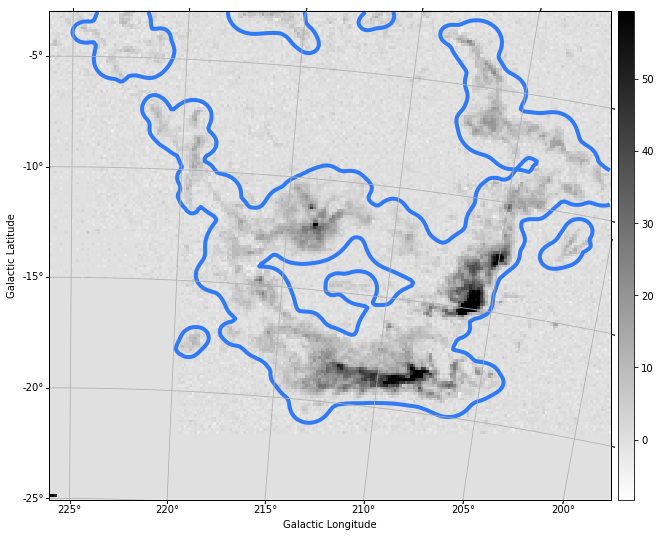

In [52]:
structs_plot(hds, [sd[884]], wcs=wcs)

In [53]:
htree[884]

(882, 883)

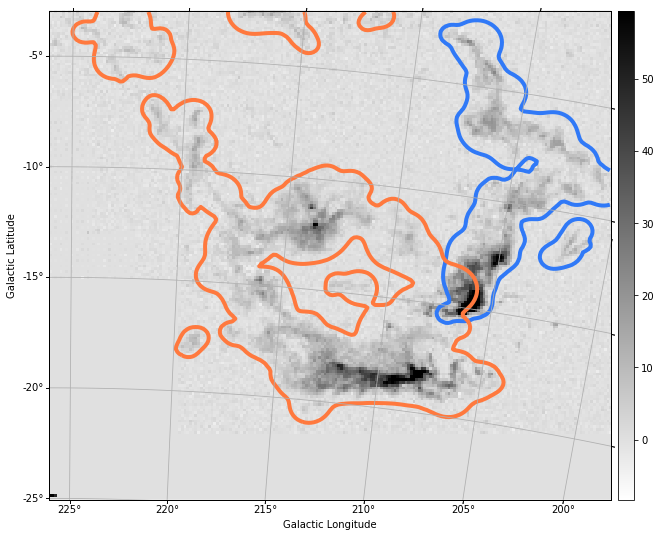

In [54]:
structs_plot(hds, [sd[882], sd[883]], wcs=wcs)

In [55]:
htree[882]

(875, 878)

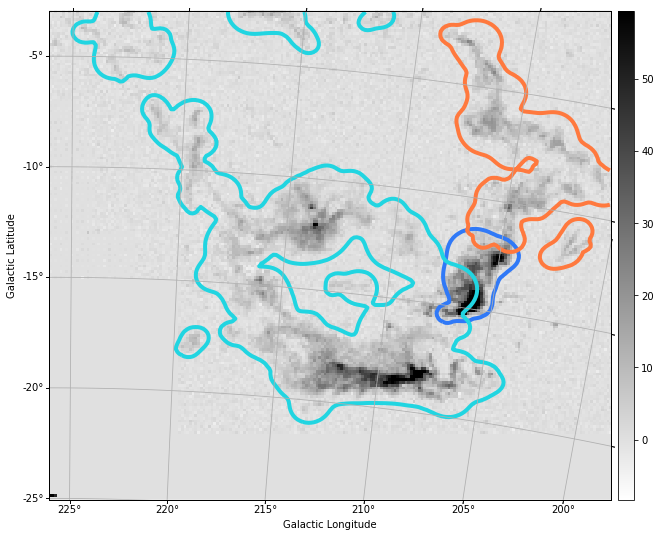

In [56]:
structs_plot(hds, [sd[875], sd[878], sd[883]], wcs=wcs)

In [57]:
htree[883]

(880, 881)

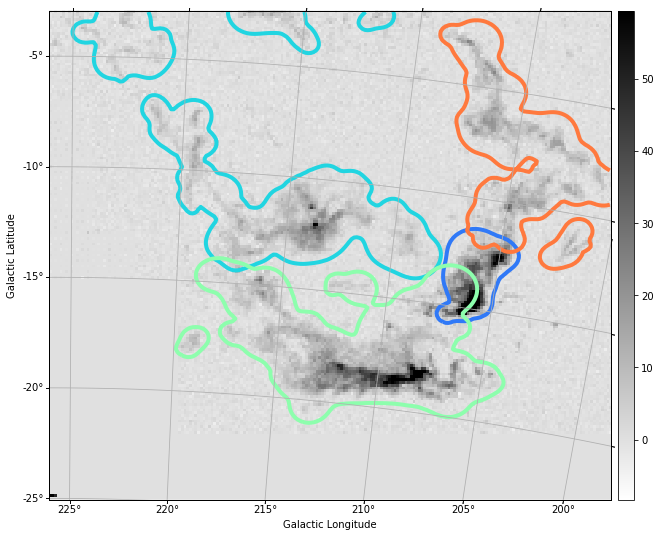

In [58]:
structs_plot(hds, [sd[875], sd[878], sd[880], sd[881]], wcs=wcs)

In [59]:
htree[880]

(874, 877)

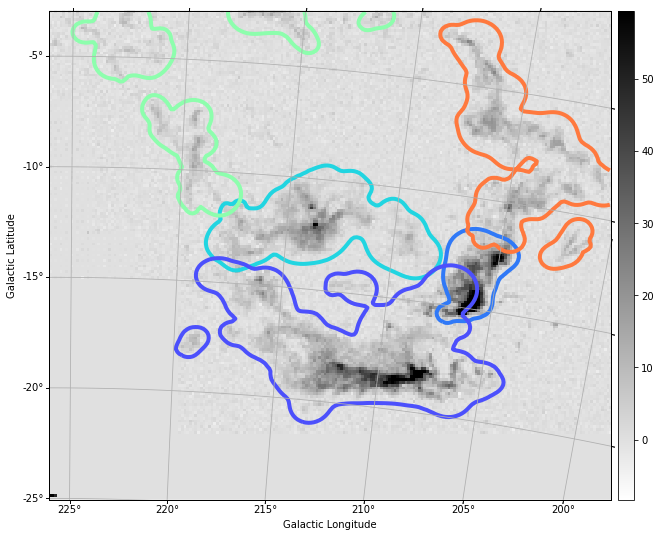

In [60]:
structs_plot(hds, [sd[875], sd[878], sd[874], sd[877], sd[881]], wcs=wcs)

In [61]:
htree[878]

(866, 873)

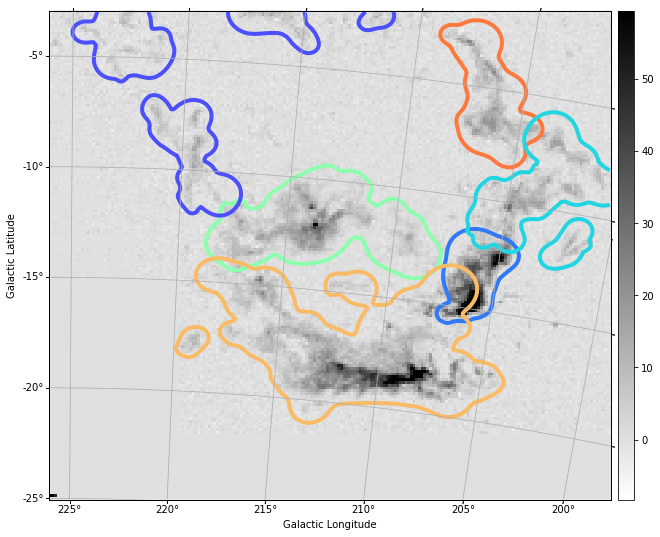

In [62]:
structs_plot(hds, [sd[875], sd[866], sd[873], sd[874], sd[877], sd[881]], wcs=wcs)

In [63]:
htree[877]

(857, 862)

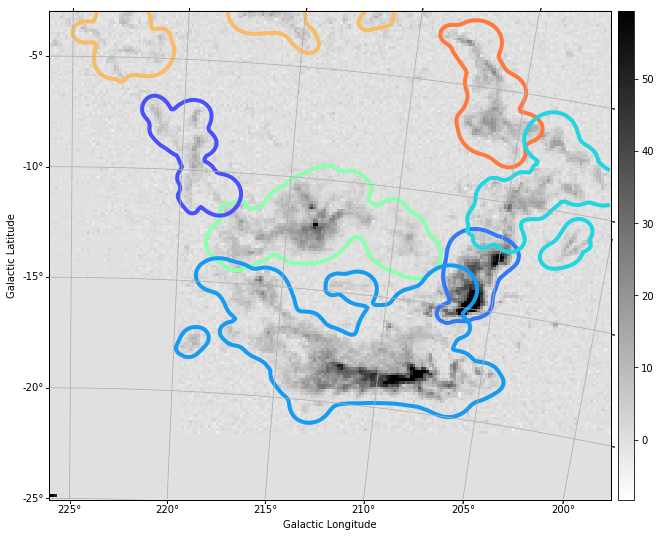

In [64]:
structs_plot(hds, [sd[875], sd[866], sd[873], sd[874], sd[857], sd[862], sd[881]], wcs=wcs)

In [65]:
htree[875]

(859, 865)

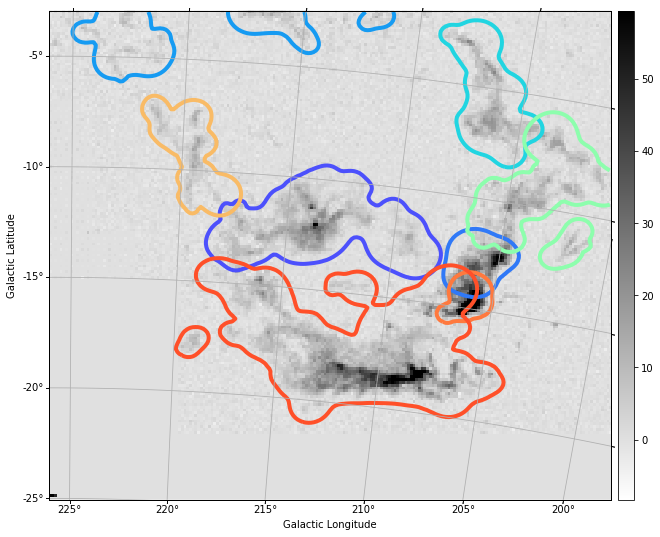

In [66]:
structs_plot(hds, [sd[859], sd[865], sd[866], sd[873], sd[874], sd[857], sd[862], sd[881]], wcs=wcs)

In [67]:
htree[874]

(854, 872)

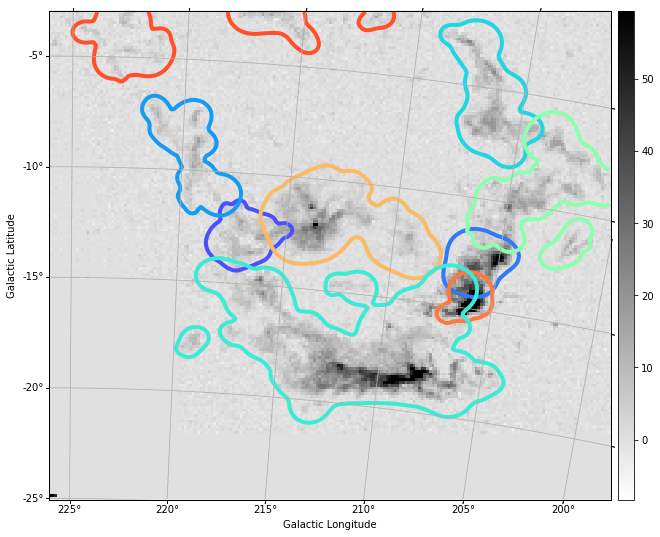

In [68]:
structs_plot(hds, [sd[859], sd[865], sd[866], sd[873], sd[854], sd[872], sd[857], sd[862], sd[881]], wcs=wcs)

In [69]:
htree[873]

(860, 861)

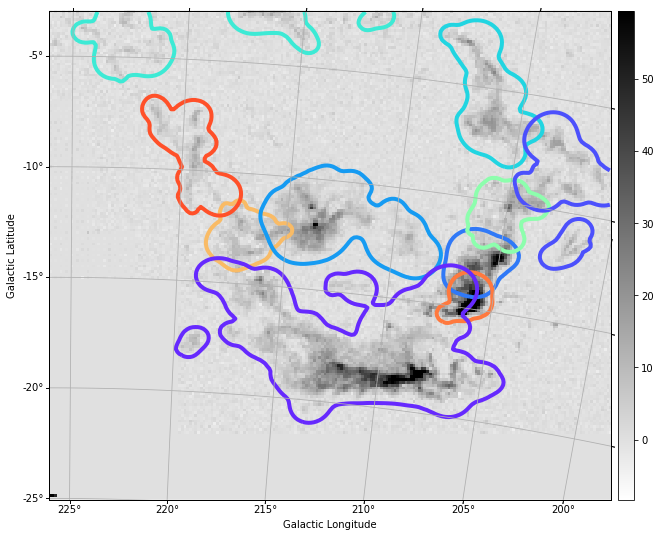

In [70]:
structs_plot(hds, [sd[859], sd[865], sd[866], sd[860], sd[861], sd[854], sd[872], sd[857], sd[862], sd[881]], wcs=wcs)

In [71]:
htree[872]

(851, 864)

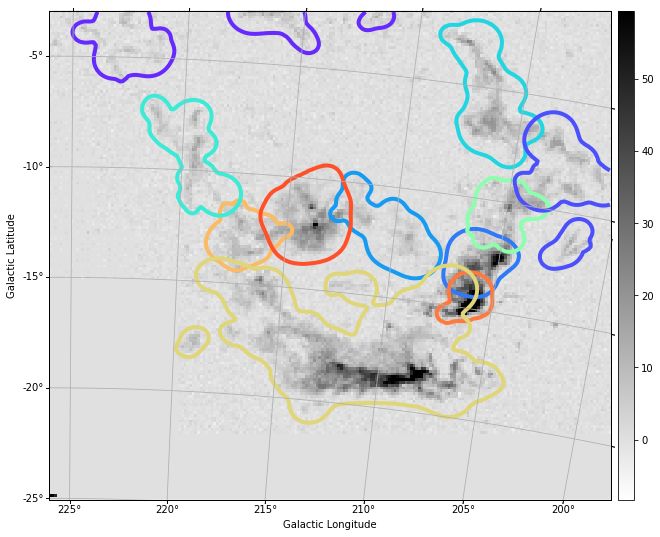

In [72]:
structs_plot(hds, [sd[859], sd[865], sd[866], sd[860], sd[861], sd[854], 
                   sd[851], sd[864], sd[857], sd[862], sd[881]], wcs=wcs)

In [83]:
htree[862]

(827, 843)

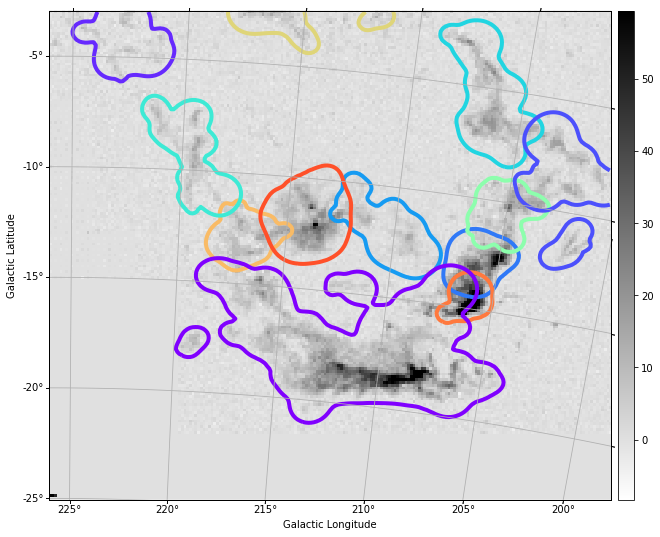

In [84]:
structs_plot(hds, [sd[859], sd[865], sd[866], sd[860], sd[861], sd[854], 
                   sd[851], sd[864], sd[857], sd[827], sd[843], sd[881]], wcs=wcs)

In [85]:
htree[843]

(671, 793)

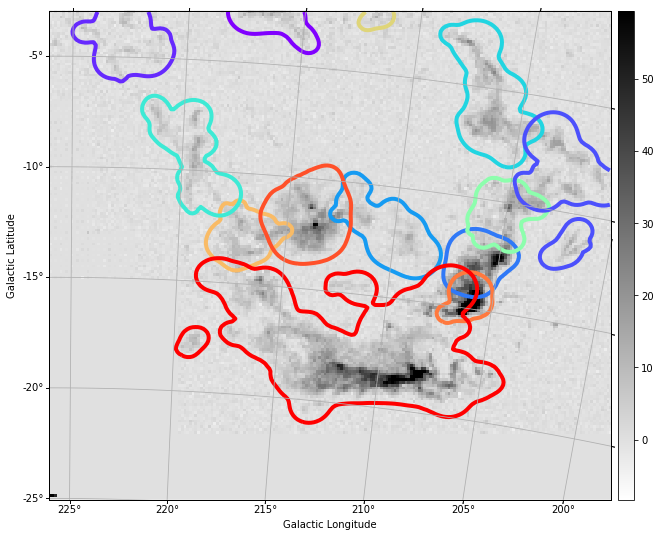

In [86]:
structs_plot(hds, [sd[859], sd[865], sd[866], sd[860], sd[861], sd[854], 
                   sd[851], sd[864], sd[857], sd[827], sd[671], sd[793], sd[881]], wcs=wcs)

In [87]:
htree[861]

(804, 855)

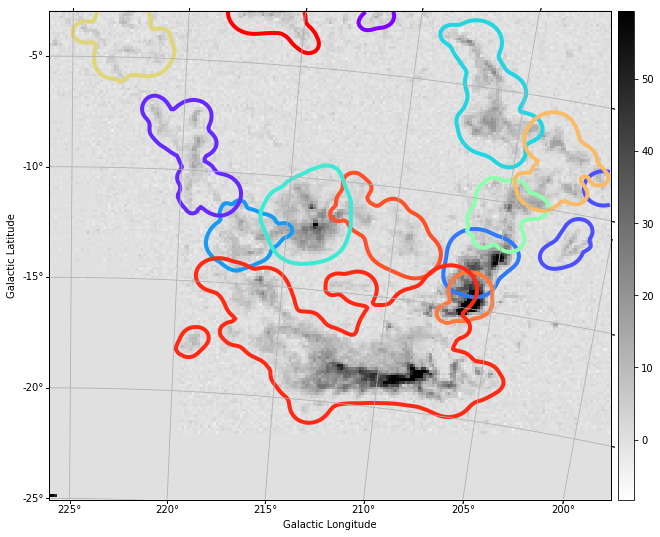

In [88]:
structs_plot(hds, [sd[859], sd[865], sd[866], sd[860], sd[804], sd[855], sd[854], 
                   sd[851], sd[864], sd[857], sd[827], sd[671], sd[793], sd[881]], wcs=wcs)

In [89]:
htree[855]

(830, 832)

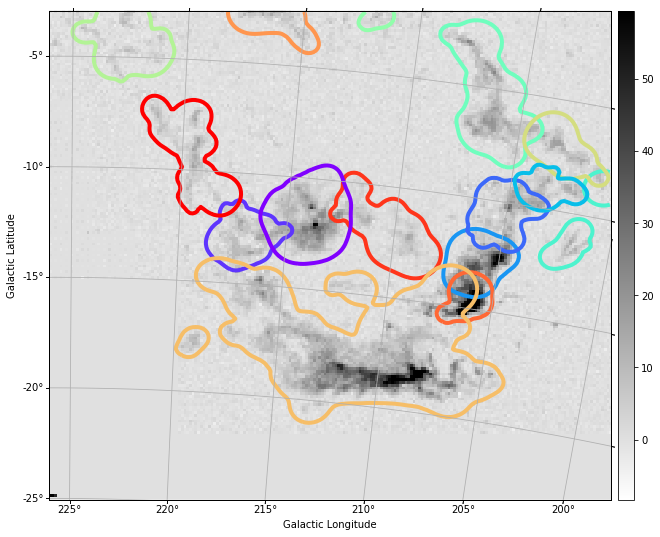

In [92]:
structs_plot(hds, [sd[859], sd[865], sd[866], sd[860], sd[804], sd[830], sd[832], sd[854], 
                   sd[851], sd[864], sd[857], sd[827], sd[671], sd[793], sd[881]], wcs=wcs)